In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
### We have to find a better way to work with this.
import sys
#sys.path.append('/Volumes/MacBookHD/Projects/PyPharmer_devel/') #Path for Angel in ashrey
sys.path.append ('/home/angel/Documents/angel/projects/PyPharmer_devel/') #path for Angel in balmunt 
#sys.path.append('/home/diego/Trabajo/Proyectos/PyPharmer_devel/') # path for Diego
import matplotlib as mt
from matplotlib import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import itertools as it
import networkx as nx
import numpy as np
import PyPharmer as phr
import simplejson as json
from pprint import pprint

In [3]:
json_file1='../Test_Systems/Pharmacophores/Set02/ZINCpharmer.json'
json_file2='../Test_Systems/Pharmacophores/Set02/pharmit.json'
json_file3='../Test_Systems/Pharmacophores/Set01/gold_soln_l2199_3D_H_Ch_m1_4.json'

In [4]:
data=phr.Descriptors (input_file=json_file3,select='enabled')

In [5]:
data.points

array([[  2.    ,  -3.3217, -13.4932,  17.2042,   0.5   ,  -3.3743,
          1.1872,   1.2498],
       [  2.    ,  -0.2209, -12.3666,  18.5766,   0.5   ,  -0.7751,
          3.7196,   0.9644],
       [  2.    ,   1.3278, -10.176 ,  19.1609,   0.5   ,   2.0982,
          2.316 ,   1.8691],
       [  2.    ,   3.4643, -10.5068,  19.7539,   0.5   ,  -0.0383,
          2.6468,   1.2761],
       [  1.    ,  -4.1716, -15.224 ,  18.6533,   1.    ,   0.    ,
          0.    ,   0.    ]])

In [6]:
data.get_cliques

<bound method Descriptors.get_cliques of <PyPharmer.analysis.Descriptors object at 0x7ff7c6a5ec50>>

In [7]:
data.plot_points

<bound method Descriptors.plot_points of <PyPharmer.analysis.Descriptors object at 0x7ff7c6a5ec50>>

In [49]:
template = '/home/angel/Dropbox/Doctorado/Experimentos/Pharmacophore_model_pharmer/pharmacophore_files/%s.json'
flist = [template % str(i) for i in range(1,10)]

In [50]:
clique=[]
for file in flist:
    data=phr.Descriptors (input_file=file,select='enabled')
    for element in data.points:
        clique.append ((element[1],element[2],element[3])) 

In [51]:
print (clique)

[(-2.4013666666666671, -13.22925, 18.541650000000001), (0.2661, -10.678800000000001, 18.441600000000001), (-2.358166666666667, -13.213516666666671, 18.521583333333339), (0.28000000000000003, -10.631, 18.420100000000001), (-1.9006666666666669, -12.940149999999999, 18.62061666666667), (0.78239999999999998, -10.3703, 18.540400000000002), (-2.2092000000000001, -13.28055, 18.502800000000001), (0.32390000000000002, -10.610900000000001, 18.403199999999998), (-4.6562000000000001, -14.415100000000001, 18.143699999999999), (-1.940366666666667, -13.060083333333329, 18.59665), (0.67900000000000005, -10.501200000000001, 18.408899999999999), (-3.2437, -14.172000000000001, 18.294499999999999), (-3.3370000000000002, -13.392200000000001, 17.199200000000001), (-0.26879999999999998, -12.366099999999999, 18.716100000000001), (3.2999000000000001, -10.4884, 19.766300000000001), (1.2125999999999999, -10.197800000000001, 19.001899999999999), (-4.2515000000000001, -15.1744, 18.542899999999999), (-1.82353333333

In [52]:
GRAPH= nx.Graph ()
GRAPH.add_nodes_from (clique)

In [53]:
for i in range (len(clique)):
    for j in range (len(clique)):
        if j>i:
            GRAPH.add_edge (clique[j],clique[i])

In [54]:
GRAPH.number_of_nodes ()

30

In [55]:
GRAPH.number_of_edges ()

435

<IPython.core.display.Javascript object>


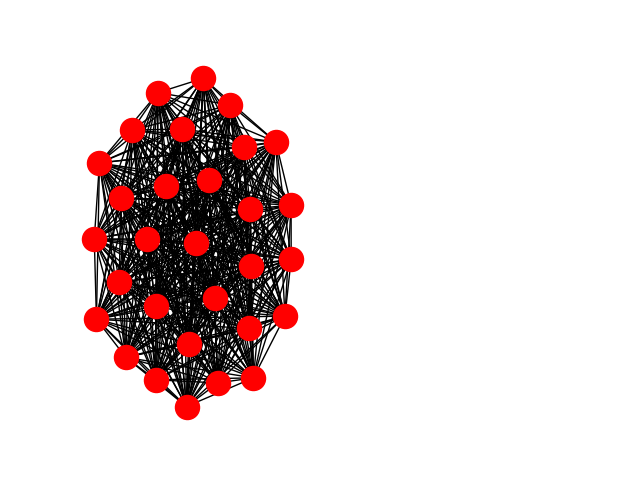

In [56]:
plt.subplot(121)
nx.draw(GRAPH,with_labels=False)
plt.show()

In [47]:
pprint(list (nx.find_cliques (GRAPH)))

[[(-2.4013666666666671, -13.22925, 18.541650000000001),
  (-2.358166666666667, -13.213516666666671, 18.521583333333339),
  (-1.9006666666666669, -12.940149999999999, 18.62061666666667),
  (-2.2092000000000001, -13.28055, 18.502800000000001),
  (0.2661, -10.678800000000001, 18.441600000000001),
  (0.28000000000000003, -10.631, 18.420100000000001),
  (0.32390000000000002, -10.610900000000001, 18.403199999999998),
  (0.78239999999999998, -10.3703, 18.540400000000002),
  (-4.6562000000000001, -14.415100000000001, 18.143699999999999)]]


In [48]:
pprint (nx.node_clique_number (GRAPH))

{(-4.6562000000000001, -14.415100000000001, 18.143699999999999): 9,
 (-2.4013666666666671, -13.22925, 18.541650000000001): 9,
 (-2.358166666666667, -13.213516666666671, 18.521583333333339): 9,
 (-2.2092000000000001, -13.28055, 18.502800000000001): 9,
 (-1.9006666666666669, -12.940149999999999, 18.62061666666667): 9,
 (0.2661, -10.678800000000001, 18.441600000000001): 9,
 (0.28000000000000003, -10.631, 18.420100000000001): 9,
 (0.32390000000000002, -10.610900000000001, 18.403199999999998): 9,
 (0.78239999999999998, -10.3703, 18.540400000000002): 9}


In [38]:
lop= data.get_nodes ()

AttributeError: 'Descriptors' object has no attribute 'get_nodes'